Find the description here:  https://gerardnico.com/data_mining/stepwise_regression

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
def convertime(datetime_str):
    return datetime.strptime(datetime_str, "%Y%m%dT000000").timestamp()

Exploration of train dataset

In [51]:
train = pd.read_csv('kc_house_train_data.csv')
print(train.size)
test = pd.read_csv('kc_house_test_data.csv')
train = train.append(test)
train.head()
print(train.size)

365064
453873


In [52]:
print("feature"," unique values")
for feature in train.columns:
   

    print(feature,"                 ",train[feature].value_counts().count())
print("date","                 ",train['date'].value_counts().count())

feature  unique values
id                   21436
date                   372
price                   4028
bedrooms                   13
bathrooms                   30
sqft_living                   1038
sqft_lot                   9782
floors                   6
waterfront                   2
view                   5
condition                   5
grade                   12
sqft_above                   946
sqft_basement                   306
yr_built                   116
yr_renovated                   70
zipcode                   70
lat                   5034
long                   752
sqft_living15                   777
sqft_lot15                   8689
date                   372


In [53]:
train['date'] = train['date'].apply(convertime)
train = train.drop(columns=['id'])
train_x = train.drop(columns=['price'])
train_y = train.price

Exploration for test dataset

In [54]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train_x.to_numpy())
scaler.transform(train_x)
scaler.transform(test_x)

array([[-1.36399255, -0.39873715, -1.44746357, ..., -0.10725074,
        -0.3013713 , -0.00261708],
       [ 0.76789436,  0.67648506,  1.14944885, ..., -1.14399786,
         0.22388825, -0.32114711],
       [ 0.04252205, -0.39873715, -0.14900736, ..., -0.02913966,
        -1.39566203, -0.29532629],
       ...,
       [-0.13439803,  0.67648506,  0.50022075, ...,  0.33301173,
         0.77832889, -0.24705418],
       [ 1.03327447,  0.67648506,  0.50022075, ..., -1.05168476,
        -0.22841859, -0.20394623],
       [-1.13399646, -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.39414129]])

In [15]:
# rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
# rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
# stats.ttest_ind(rvs1,rvs2)

stats.ttest_ind(np.array(train_y),np.array(train_x.sqft_lot), equal_var = False)


Ttest_indResult(statistic=185.81498191246325, pvalue=0.0)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=42)


[-0.00013255]
[122004.01002698]
[253430.84453534]
[284.30537111]
[0.9116076]
[176518.82147749]
[1208402.23868897]
[194541.01566785]
[22094.74711509]
[208425.87079646]
[271.71426005]
[275.94067142]
[613.83977167]
[117.98677161]
[-417.57091701]
[802942.10599644]
[73212.62872111]
[313.39920708]
[1.1320915]


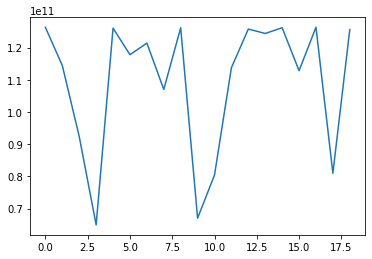

['date' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15']
3
64914600784.03867


In [22]:
lim = []
for feat in x_train.columns.to_numpy():
    model1 = LinearRegression(fit_intercept=True)
    model1.fit(np.array(np.matrix(x_train[ feat ].to_numpy()).T),y_train.to_numpy())
    print(model1.coef_)
    Y_pred = model1.predict(np.array(np.matrix(x_test[ feat ].to_numpy()).T))
    a=mean_squared_error(y_test.to_numpy(),Y_pred)
    lim.append(a)
plt.close()
plt.plot(np.arange(len(x_train.columns.to_numpy())),lim)
plt.show()
print(x_train.columns.to_numpy())
    
print(np.argmin(lim))
print(lim[3])

In [55]:

def model_train(train_x,test_x, train_y, test_y):
#     param_dict= dict.fromkeys(train_x.columns.to_numpy(), 0)
#     param_dict['intercept'] = train_y.mean()
    number_of_features = (train_x.iloc[0].size)
    number_of_samples =  train_x['bedrooms'].size
    feature_weight_list = []
    for i in range(20):
        feature_weight_list.append([[],[]])
    keys = train_x.columns.to_numpy()
    values = np.arange(19)
    feature_dict = {keys[i]: values[i] for i in range(len(keys))} 
    inv_dict = {v: k for k, v in feature_dict.items()} 

    feature = []


    over_all_score = 100000000000000000
    feature_set = train_x.columns.tolist()
#     print("wedwe",(feature_set))
    train_errors = []
#     validation_errors = []
    test_errors = []
    residual = train_y.to_numpy()-np.ones(number_of_samples)*train_y.mean()
#     print(len(residual))
    p = np.dot(residual,residual)/number_of_samples
#     validation_errors.append(p)
    train_errors.append(p)
    test_errors.append(p)
    
    
    model_features = []
    lets_count = 0
    while True:
        lets_count +=1
        
#         print(type(feature_set))
#         print(len(feature_set))
        if len(feature_set)==0:
            model_features, best_model, train_errors, test_errors, feature_weight_list, inv_dict, model_features, best_model
#         scores = []
#         models = []
        
        
        best_score = 10000000000000000
        best_feature = 'dwdqdqw'
        for feature in feature_set:
            features_to_train = model_features.copy()
            features_to_train.append(feature)
            model1 = LinearRegression(fit_intercept=True)
#             print("length",len(residual))
            model1.fit(np.array(np.matrix(train_x.loc[ : , features_to_train ].to_numpy())),train_y.to_numpy())
#             Y_pred = model1.predict(np.array(np.matrix(validation_x.loc[ : , features_to_train ].to_numpy())))
            y_train_pred = model1.predict(np.array(np.matrix(train_x.loc[ : , features_to_train ].to_numpy())))
            y_test_pred = model1.predict(np.array(np.matrix(test_x.loc[ : , features_to_train ].to_numpy())))
#             models.append(model1)
#             a=mean_squared_error(validation_y.to_numpy(),Y_pred)
            b = mean_squared_error(train_y.to_numpy(),y_train_pred)
            c = mean_squared_error(test_y.to_numpy(),y_test_pred)
#             scores.append(a)
            if best_score>b:
                best_score = b
                best_score_train = b
                best_score_test = c
                best_model = model1
                best_feature = feature
                best_feature_set = features_to_train

#         print("score", scores)
#         print(best_model.coef_)
        if best_score !=100000000000000000000000:
#             validation_errors.append(best_score)
            train_errors.append(best_score_train)
            test_errors.append(best_score_test)
            for ft,u in zip(best_feature_set,best_model.coef_):
                p = feature_weight_list[feature_dict[ft]]
# lists
                p[0].append(lets_count)
                p[1].append(u)
                
            
            
#         print("best_score", best_score)
        if (over_all_score - best_score)<.5 :
             return model_features, best_model,train_errors, test_errors, feature_weight_list, inv_dict, model_features, best_model
        over_all_score = best_score
        
        feature_set.remove(best_feature)
#         print("best_feature", best_feature)
        model_features.append(best_feature)
    return model_features, best_model,train_errors, test_errors, feature_weight_list, inv_dict, model_features, best_model
            
        

TRAIN: [ 2162  2163  2164 ... 21610 21611 21612] TEST: [   0    1    2 ... 2159 2160 2161]


KeyError: "None of [Int64Index([ 2162,  2163,  2164,  2165,  2166,  2167,  2168,  2169,  2170,\n             2171,\n            ...\n            21603, 21604, 21605, 21606, 21607, 21608, 21609, 21610, 21611,\n            21612],\n           dtype='int64', length=19451)] are in the [columns]"

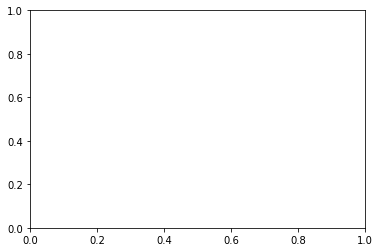

In [56]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
kf = KFold(n_splits=10)
kf.get_n_splits(train_x)
for train_index, test_index in kf.split(train_x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_x[train_index], train_x[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]
    a,b ,d, e, f, g, h, i= model_train(X_train ,X_test, y_train, y_test )
    # c = b.predict(test_x.to_numpy())
    # # print(test_y.to_numpy())
    # print(d)
    # print(mean_squared_error(test_y.to_numpy(),c))
    # k = np.arange(len(c))
    # yint = range(np.min(k), np.max(k)+1)
    # plt.yticks(yint)

    # ax.plot(np.arange(len(c)), c, label ="validation")
    ax.plot(np.arange(len(d)), d, label = "train")
    ax.plot(np.arange(len(e)), e, label = "test")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend()



In [37]:
print(len(h))

18


In [32]:
print(f[2][0])
f = np.array(f)
maxvar = []
for i in range(19):
    maxvar.append(np.var(f[i][1]))
print(maxvar)

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[2.657927575945013e-10, 5812960.005082986, 4553858.916299261, 1958.8164837634556, 1.2446892520380055e-21, 9039.516092471744, 8299768208.167322, 1119951.7471348487, 5553230.187974517, 76567692.93519834, 173.70900534841442, 0.0, 22863.325152090565, 0.03009107802557086, 3278.34824032802, 2257102522.129526, 92556912.97245842, 0.8526554433444723, 0.002749718106259998]


####################coefficient profiles ################################

Text(0, 0.5, 'root mean square error')

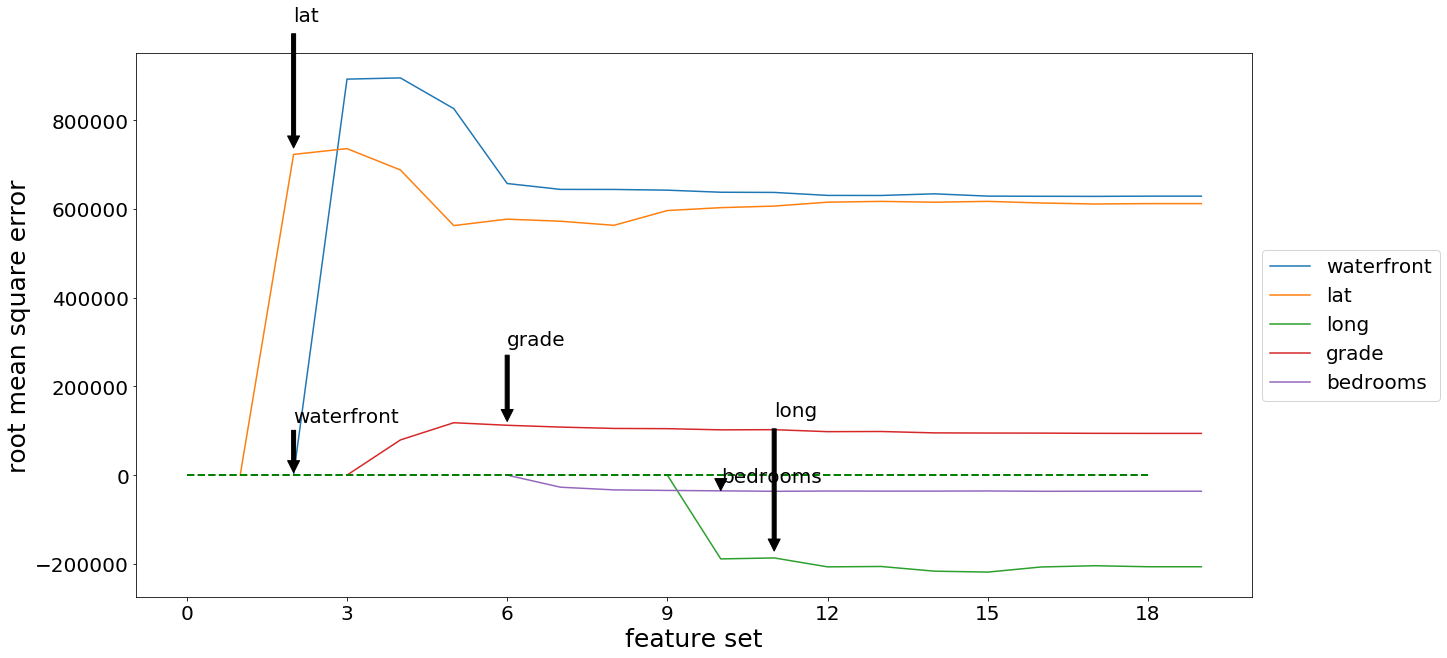

In [33]:

varind = np.array(maxvar).argsort()[-5:][::-1]

ax = plt.figure(figsize =(20,10)).gca()
count = 0
for i in varind:
#     print(len(f[i][1]))
    m = min(f[i][0])
#     print(m)
    f[i][0].insert(0,m-1)
    f[i][1].insert(0,0)
    ax.plot(f[i][0], f[i][1], label = g[i])

    


# Put a legend to the right of the current axis

    ax.annotate( g[i], xy=(f[i][0][count], f[i][1][count]), xytext=(f[i][0][count],f[i][1][count]+i*20000 ),size=20,
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    count +=1
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) 
ax.plot(range(19), np.zeros(19), color='green', linestyle='dashed',linewidth=2, markersize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
plt.xlabel('feature set', fontsize=25)
plt.ylabel('root mean square error', fontsize=25)
# plt.legend()
# plt.show()